# 問題:成大男生就學期間是否脫魯?(been in relationship:Yes/No)


# 特徵:年級(year)、身高(height)、是否有運動習慣(exercise habit:Yes/No)、是否就讀醫學院(study in medicine:Yes/No)、是否跑過系外活動(extracurricular activities:Yes/No)

# 規則:1.年級越高則越高機率已經脫魯 2.身高<170或>185脫魯機率降低 3.有運動習慣會使脫魯機率提高 4.就讀醫學院使脫魯機率提高 5.跑過系外活動使脫魯機率略提高 6.有運動習慣且就讀醫學院必然脫魯。

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import accuracy_score
import numpy as np

### 資料讀取與整理，確認無遺漏

In [12]:
df=pd.read_csv('hw2data.csv')
print(df.head())

exer_map={'Yes':1, 'No':0}
med_map = {'No':0, 'Yes':1}
act_map={'Yes':1,'No':0}
rel_map={'yes':1,'no':0}
df['exercise habit']=df['exercise habit'].map(exer_map)
df['study in medicine']=df['study in medicine'].map(med_map)
df['extracurricular activities']=df['extracurricular activities'].map(act_map)
df['been in relationship']=df['been in relationship'].map(rel_map)

  been in relationship  year  height exercise habit study in medicine  \
0                   no     1     173            Yes                No   
1                  yes     4     177            Yes               Yes   
2                  yes     2     175            Yes                No   
3                   no     1     175             No               Yes   
4                  yes     2     169            Yes               Yes   

  extracurricular activities  
0                         No  
1                         No  
2                         No  
3                         No  
4                         No  


In [13]:
#print(df.head())
df.isnull().sum()

been in relationship          0
year                          0
height                        0
exercise habit                0
study in medicine             0
extracurricular activities    0
dtype: int64

### 資料分群，建立決策樹模型，並優化最大深度，使預測準確率最佳。

bestdepth 6 ,best accuracy_score: 0.7933333333333333 



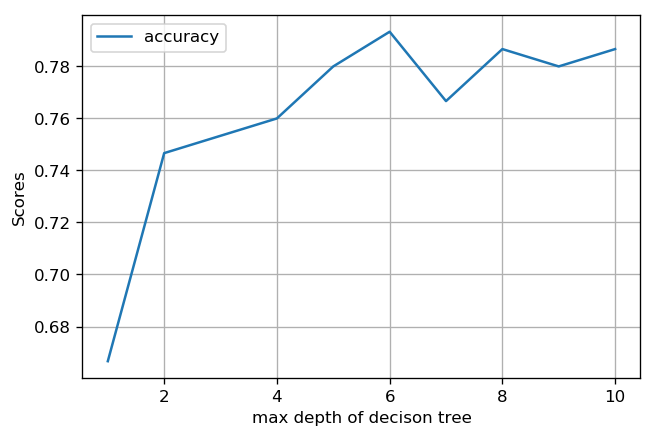

In [52]:
train=df[:250]
df_test=df[250:]

y=train['been in relationship'].values
x=train.drop('been in relationship', 1)

test=df_test['been in relationship'].values
df_test=df_test.drop('been in relationship', 1)

accuscore=np.array([])

for i in range(1,11):
    
    dtree= DecisionTreeClassifier(max_depth=i)
    dtree.fit(x,y)

    predict=dtree.predict(df_test)
    accuscore=np.append(accuscore,accuracy_score(test,predict))
    
accubest_index = np.argmax(accuscore)
print("bestdepth",accubest_index+1,",best accuracy_score:",accuscore[accubest_index],'\n')     

from matplotlib import pyplot as plt
depths = np.arange(1,11)
plt.figure(figsize=(6,4), dpi=120)
plt.grid()
plt.xlabel('max depth of decison tree')
plt.ylabel('Scores')
plt.plot(depths, accuscore, label='accuracy')
plt.legend()


### 特徵重要度一覽及最佳決策樹出圖

<BarContainer object of 5 artists>

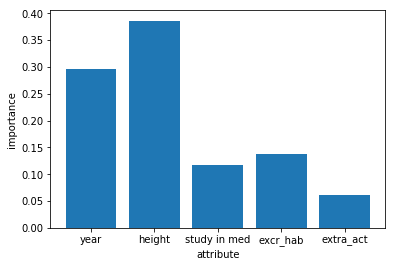

In [53]:
#print(dtree.feature_importances_)

importance=np.array(['year','height','study in med','excr_hab','extra_act'])
plt.xlabel('attribute')
plt.ylabel('importance')
plt.bar(importance, dtree.feature_importances_)

In [55]:
dtree= DecisionTreeClassifier(max_depth=accubest_index+1)
dtree.fit(x,y)

dot_data=StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(x),
                class_names=['Not been in relationship', 'been in relationship'],
                special_characters=True)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree6.pdf")

True

### 分析報告

#### 1.此模型預測準確度逼近0.8，為偏低但可接受的準確度。原因為加入了一些不符合規則的雜訊，不管是違反類似規則1的鬆散定義雜訊或是違反規則6的嚴格定義雜訊。
#### 2.年級的重要度偏高，可說與我自定義的規則1算是符合。
#### 3.身高的重要度最高，是在合成資料時，優先考量身高因素。
#### 4.就讀醫學系、運動習慣、課外活動的重要度差不多，是因在合成資料時，將這三個因素放在相等地位考量。
#### 5.至於為何規則6明明嚴格定義  "醫學系+運動習慣"必定脫魯，且決策樹也顯示有59/63的樣本數是脫魯的，但這兩個因素的重要度卻低? 這是因為當"醫學系+運動習慣"共同滿足時，已經不再需要做決策的動作，而是會指向單一結果。另外4/63沒脫魯是故意加入的雜訊。
#### 6.從此次決策樹與自己合成資料比較，能發覺人腦在做決定時，複雜條件交互影響下，會產出不同結果。就如同決策樹，在此模型中，同樣的判斷條件下，能預測我們可能下的決策準確率達到八成，但仍有兩成的不準確率，就是因複雜條件交互影響。

